In [1]:
#pip install psycopg2 pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.io.sql as sqlio
import psycopg2 as ps
import warnings
warnings.filterwarnings("ignore")

In [3]:
conn = ps.connect(dbname ="Northwind",
                 user = "postgres",
                 password = "Husnu1998",
                 port = "5432")

In [4]:
sql1 = """SELECT
	DATE_TRUNC('month', shipped_date)::DATE AS date,
	SUM(od.unit_price * quantity) AS total_price,
	COUNT(o.order_id) total_order
FROM orders AS o
	JOIN order_details AS od 
		ON o.order_id = od.order_id
	JOIN products AS P ON od.product_id = p.product_id
WHERE
	NOT shipped_date IS NULL
GROUP BY 1
ORDER BY 1
"""

In [5]:
df1 = sqlio.read_sql_query(sql1, conn)
df1

,date,total_price,total_order
0,1996-07-01,22483.400217,48
1,1996-08-01,26861.799989,58
2,1996-09-01,18700.500011,55
3,1996-10-01,47269.000133,82
4,1996-11-01,43688.400362,53
5,1996-12-01,51109.200450,83
6,1997-01-01,69645.300436,92
7,1997-02-01,35015.099918,71
8,1997-03-01,49595.000245,83
9,1997-04-01,33392.289863,70


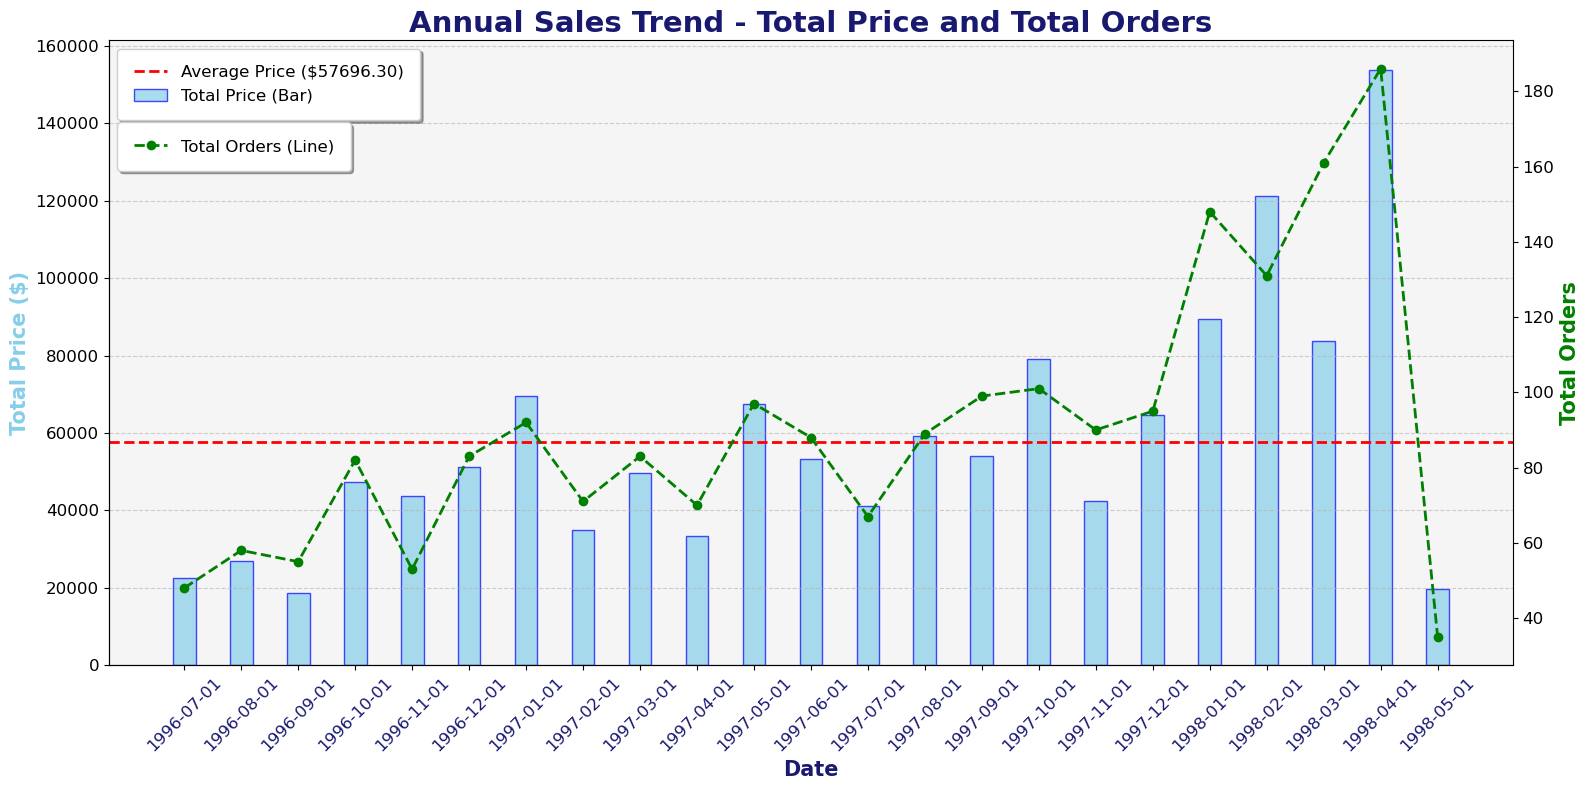

In [6]:





# Let's edit the bar width and position to make the chart more readable.
bar_width = 0.4
x = np.arange(len(df1))

# Let's set the chart size and figure.
fig, ax1 = plt.subplots(figsize = (16, 8))

# Bar grafiği (Total Price)
ax1.bar(x, df1["total_price"], color = "skyblue", alpha = 0.7, label = "Total Price (Bar)", width = bar_width, edgecolor = "blue")

# # Let's add a line showing the average price.
average_price = df1["total_price"].mean()
ax1.axhline(y = average_price, color = "red", linestyle = "--", linewidth = 2, label = f"Average Price (${average_price:.2f})")

# Let's create the second y-axis(Right) where we will show Total Orders
ax2 = ax1.twinx()
ax2.plot(x, df1["total_order"], color = "green", linestyle = "--", linewidth = 2, marker = "o", label = "Total Orders (Line)", markersize = 6)

# Axis and head settings
ax1.set_title("Annual Sales Trend - Total Price and Total Orders", fontsize = 21, fontweight = "bold", color = "midnightblue")
ax1.set_xlabel("Date", fontsize = 15, fontweight = "bold", color = "midnightblue")
ax1.set_ylabel("Total Price ($)", fontsize = 15, fontweight = "bold", color = "skyblue")
ax2.set_ylabel("Total Orders", fontsize = 15, fontweight = "bold", color = "green")
ax1.set_xticks(x)
ax1.set_xticklabels(df1["date"], rotation = 45, fontsize = 12, color = "midnightblue")
ax1.tick_params(axis = "y", labelsize = 12)
ax2.tick_params(axis = "y", labelsize = 12)

# I placed the legend of the second(Right) axis under the legend of the first(Left) axis with the bbox_to_anchor function.
ax1.legend(fontsize = 12, loc = "upper left", frameon = True, shadow = True, borderpad = 1)
ax2.legend(fontsize = 12, loc = "upper left", frameon = True, shadow = True, borderpad = 1,
           bbox_to_anchor = (0.0, 0.882)) 
#Grid settings for first axis
ax1.grid(axis = "y", linestyle = "--", alpha = 0.6)

#I adjusted the background color and border settings
ax1.set_facecolor("whitesmoke")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

In [7]:
sql21 = """select  c.category_name,
		count(o.order_id)
from categories as c
join products as p
	on  p.category_id = c.category_id
join order_details as od
	on od.product_id = p.product_id
join orders as o
	on o.order_id = od.order_id
join customers as cs
	on cs.customer_id = o.customer_id
group by 1
order by 2 desc"""

In [8]:
df21 = sqlio.read_sql_query(sql21, conn)
df21

,category_name,count
0,Beverages,404
1,Dairy Products,366
2,Confections,334
3,Seafood,330
4,Condiments,216
5,Grains/Cereals,196
6,Meat/Poultry,173
7,Produce,136


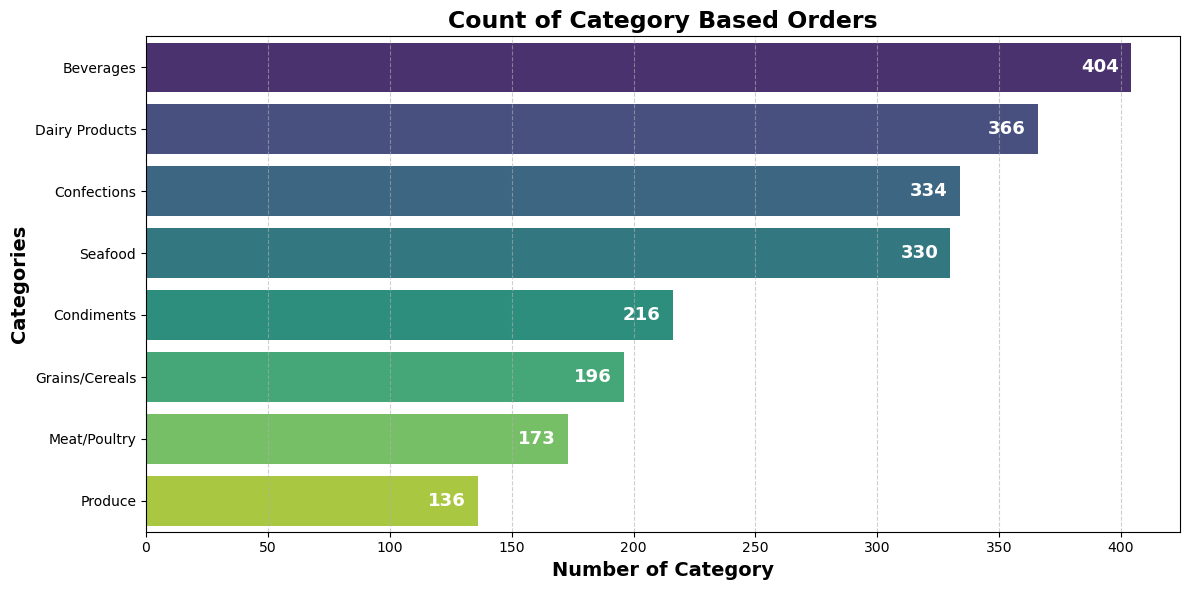

In [9]:



plt.figure(figsize = (12, 6))

# Let's create the graph
sns.barplot(data = df21, x = "count", y = "category_name", palette = "viridis")

# I used this codes because I wanted to see the values inside the bars.
for index, value in enumerate(df21["count"]):
    plt.text(value - 5, index, str(value), color = "white", fontsize = 13, va = "center", fontweight = "bold", ha = "right")

# Graph customization
plt.title("Count of Category Based Orders", fontsize = 17, fontweight = "bold")
plt.xlabel("Number of Category", fontsize = 14, fontweight = "bold")
plt.ylabel("Categories", fontsize = 14, fontweight = "bold")
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.tight_layout()
plt.show()


In [10]:
sql23 = """
WITH top_10_product AS (
    SELECT 
        p.product_name,
        c.category_name,
        COUNT(o.order_id) AS total_order
    FROM categories AS c
    JOIN products AS p
        ON p.category_id = c.category_id
    JOIN order_details AS od
        ON od.product_id = p.product_id
    JOIN orders AS o
        ON o.order_id = od.order_id
    JOIN customers AS cs
        ON cs.customer_id = o.customer_id
    GROUP BY 1, 2
    ORDER BY 3 DESC
    LIMIT 10
)
SELECT 
    CONCAT(product_name, ' (', category_name, ')') AS product_with_category,
    total_order
FROM top_10_product;
"""

In [11]:
df23 = sqlio.read_sql_query(sql23, conn)
df23

,product_with_category,total_order
0,Raclette Courdavault (Dairy Products),54
1,Camembert Pierrot (Dairy Products),51
2,Guaraná Fantástica (Beverages),51
3,Gorgonzola Telino (Dairy Products),51
4,Gnocchi di nonna Alice (Grains/Cereals),50
5,Tarte au sucre (Confections),48
6,Jack's New England Clam Chowder (Seafood),47
7,Rhönbräu Klosterbier (Beverages),46
8,Chang (Beverages),44
9,Pavlova (Confections),43


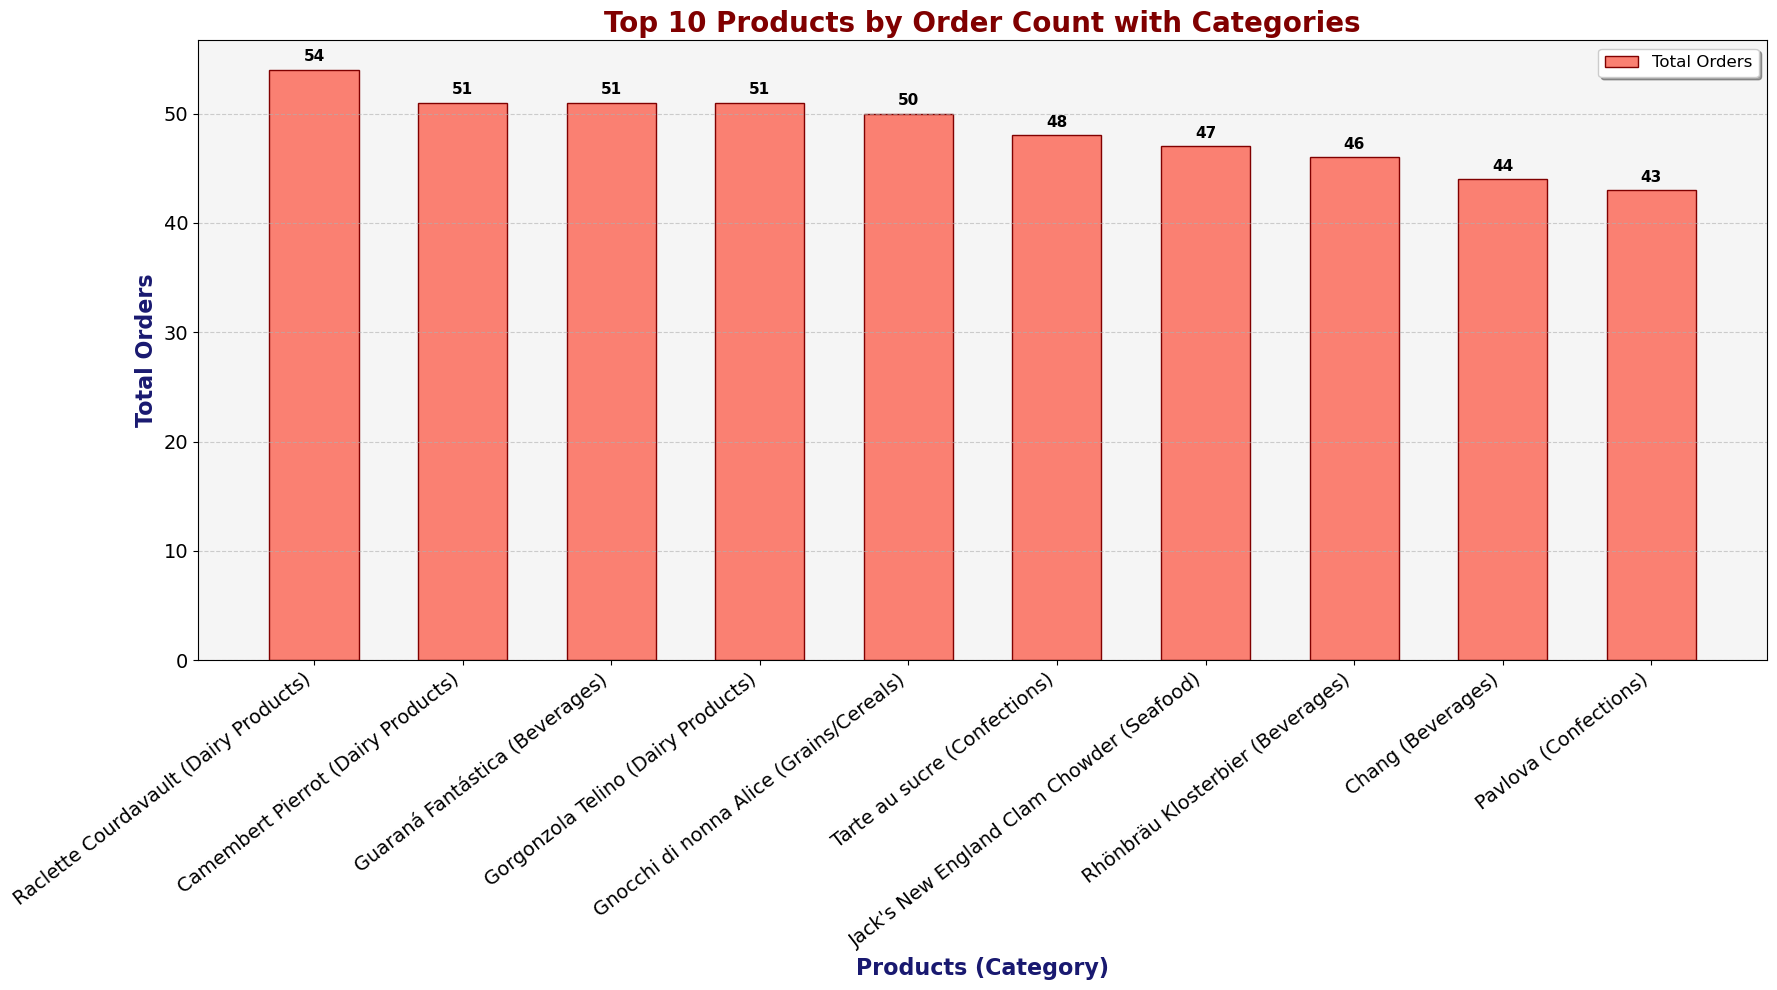

In [12]:


# I create the ordered indexes for the X axis and assign the bar width for visualizing.
x = np.arange(len(df23))  
bar_width = 0.6

plt.figure(figsize = (18, 10))

#Let's create the bar graph.
plt.bar(x, df23["total_order"], color = "salmon", edgecolor = "maroon", width = bar_width, label = "Total Orders")

# This time I want to see the values above the bars.
for i, value in enumerate(df23["total_order"]):
    plt.text(i, value + 0.5, str(value), ha = "center", va = "bottom", fontsize = 11, color = "black", weight = "bold")

# Axis settings
plt.title("Top 10 Products by Order Count with Categories", fontsize = 20, fontweight = "bold", color = "maroon")
plt.xlabel("Products (Category)", fontsize = 16, fontweight = "bold", color = "midnightblue")
plt.ylabel("Total Orders", fontsize = 16, fontweight = "bold", color = "midnightblue")
plt.xticks(x, df23["product_with_category"], rotation = 37.5, fontsize = 14, ha = "right")
plt.yticks(fontsize = 14)

# Grid and background settings
plt.grid(axis="y", linestyle = "--", alpha = 0.6)
plt.gca().set_facecolor("whitesmoke")

# Let's visualize after adjusting the Legend settings
plt.legend(loc = "upper right", fontsize = 12, frameon = True, shadow = True)

plt.tight_layout()
plt.show()

In [13]:
sql22 = """SELECT
	c.category_name,
	DATE_TRUNC('month', shipped_date)::DATE AS date,
	round((SUM((od.unit_price - od.unit_price*discount) * quantity))::int,2) AS total_price,
	COUNT(o.order_id) total_order
FROM categories AS c
    JOIN products AS p
        ON p.category_id = c.category_id
    JOIN order_details AS od
        ON od.product_id = p.product_id
    JOIN orders AS o
        ON o.order_id = od.order_id
    JOIN customers AS cs
        ON cs.customer_id = o.customer_id
WHERE
	NOT shipped_date IS NULL
GROUP BY 1,2
ORDER BY 1,2"""

In [14]:
df22 = sqlio.read_sql_query(sql22, conn)
df22

,category_name,date,total_price,total_order
0,Beverages,1996-07-01,2227.0,8
1,Beverages,1996-08-01,4672.0,12
2,Beverages,1996-09-01,2923.0,11
3,Beverages,1996-10-01,9598.0,17
4,Beverages,1996-11-01,15610.0,13
...,...,...,...,...
179,Seafood,1998-01-01,9010.0,23
180,Seafood,1998-02-01,15422.0,24
181,Seafood,1998-03-01,9090.0,26
182,Seafood,1998-04-01,11112.0,30


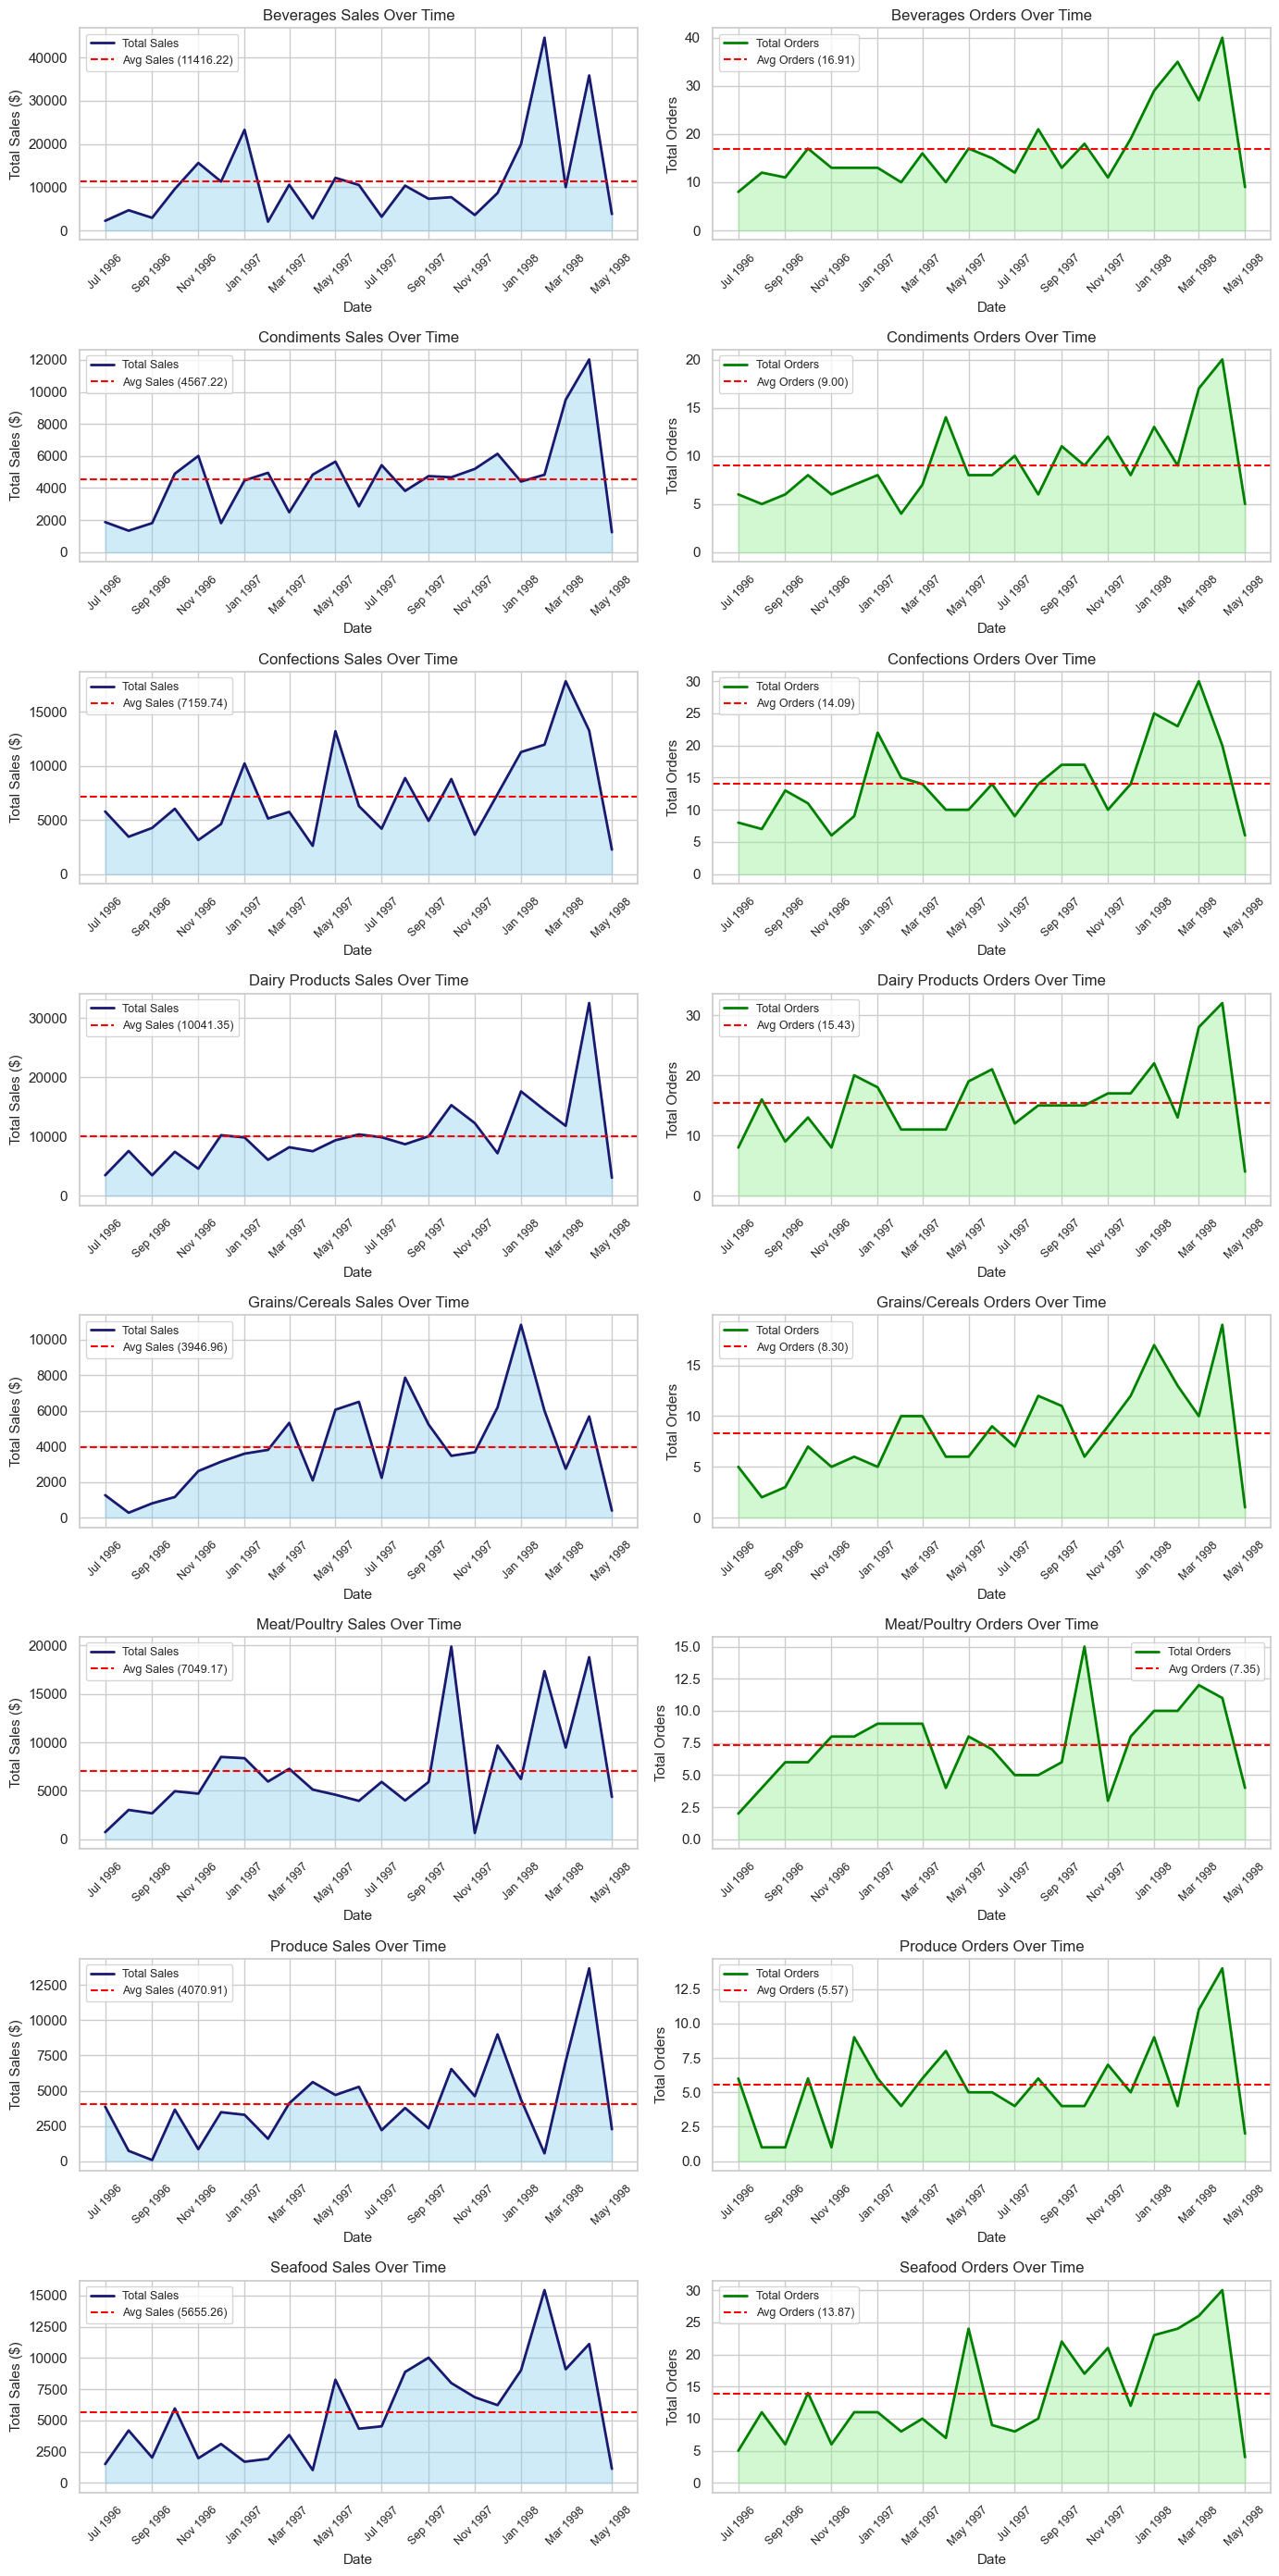

In [15]:


# In order to use the date format, it has to be in date-time format. So I change the format first.
df22["date"] = pd.to_datetime(df22["date"], errors = "coerce")

# Graph setting
sns.set(style="whitegrid")
fig, axes = plt.subplots(8, 2, figsize = (14, 28))  

# Since I will do a category-based analysis, I extract categories from the data I pull from SQL.
categories = df22["category_name"].unique()

# I draw subplots for each category.
# Since I will analyze Total Sales in the first column and Total Order in the second column, I indicate their places on the axis.
for i, category in enumerate(categories):
    ax_price = axes[i, 0]   # First column for Total Sales
    ax_order = axes[i, 1]   # Second Columns for Total Orders
    
    category_data = df22[df22['category_name'] == category]
    
    # I create Total Sales with area chart
    ax_price.fill_between(category_data["date"], category_data["total_price"], color = "skyblue", alpha = 0.4)
    ax_price.plot(category_data["date"], category_data["total_price"], label = "Total Sales", color = "midnightblue", linewidth = 2)
    average_sales = category_data["total_price"].mean() # Let's add a avg line
    ax_price.axhline(average_sales, color = "red", linestyle = "--", label = f"Avg Sales ({average_sales:.2f})")
    ax_price.set_title(f"{category} Sales Over Time", fontsize=12)
    ax_price.set_xlabel("Date", fontsize=11)
    ax_price.set_ylabel("Total Sales ($)", fontsize = 11)
    ax_price.set_xticks(category_data["date"][::int(len(category_data) / 10)])  # Setting number of ticks
    ax_price.set_xticklabels(category_data["date"][::int(len(category_data) / 10)].dt.strftime("%b %Y"), rotation = 45, fontsize = 9)
    ax_price.legend(fontsize = 9)
    
    # I create Total Orders with area chart
    ax_order.fill_between(category_data["date"], category_data["total_order"], color = "lightgreen", alpha = 0.4)
    ax_order.plot(category_data["date"], category_data["total_order"], label = "Total Orders", color = "green", linewidth = 2)
    average_orders = category_data["total_order"].mean() # Let's add a avg line
    ax_order.axhline(average_orders, color = "red", linestyle = "--", label = f"Avg Orders ({average_orders:.2f})")
    ax_order.set_title(f"{category} Orders Over Time", fontsize = 12)
    ax_order.set_xlabel("Date", fontsize = 11)
    ax_order.set_ylabel("Total Orders", fontsize = 11)
    ax_order.set_xticks(category_data["date"][::int(len(category_data) / 10)]) # Setting number of ticks
    ax_order.set_xticklabels(category_data["date"][::int(len(category_data) / 10)].dt.strftime("%b %Y"), rotation = 45, fontsize = 9)
    ax_order.legend(fontsize = 9)

plt.tight_layout()
plt.show()